In [1]:
from sklearn import set_config

set_config(print_changed_only=False)

In [2]:
import pandas as pd

from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Scaling is not required since all features have same unit

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['sepal length (cm)'] = scaler.fit_transform(df[['sepal length (cm)']])
df['sepal width (cm)'] = scaler.fit_transform(df[['sepal width (cm)']])
df['petal length (cm)'] = scaler.fit_transform(df[['petal length (cm)']])
df['petal width (cm)'] = scaler.fit_transform(df[['petal width (cm)']])

In [4]:
df['Type'] = iris.target
df.sample(n=5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
33,5.5,4.2,1.4,0.2,0
31,5.4,3.4,1.5,0.4,0
71,6.1,2.8,4.0,1.3,1
109,7.2,3.6,6.1,2.5,2
6,4.6,3.4,1.4,0.3,0


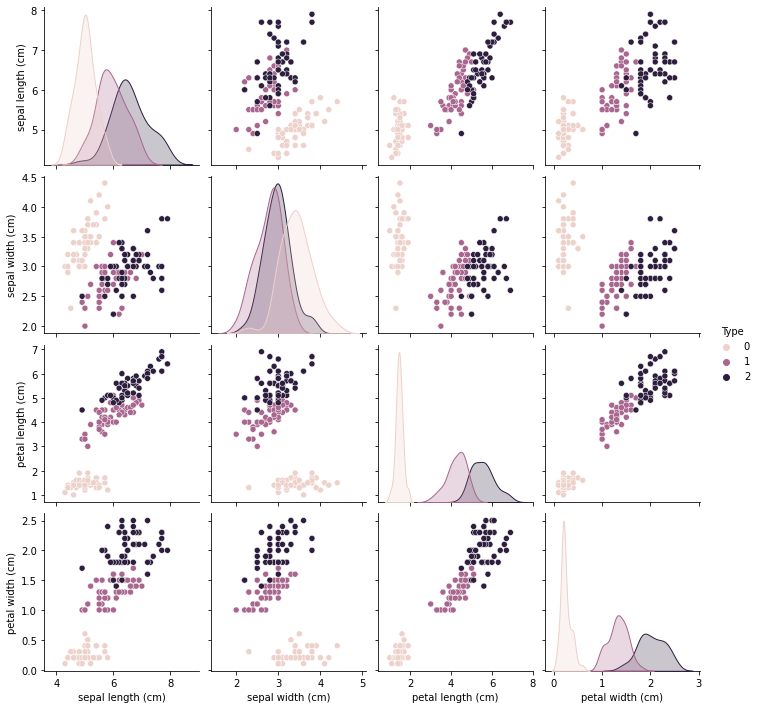

In [5]:
import seaborn as sns

sns.pairplot(df, hue='Type');

In [6]:
df.drop('Type', axis='columns', inplace=True)
df.sample(n=5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
32,5.2,4.1,1.5,0.1
105,7.6,3.0,6.6,2.1
72,6.3,2.5,4.9,1.5
113,5.7,2.5,5.0,2.0
40,5.0,3.5,1.3,0.3


In [7]:
from sklearn.cluster import KMeans

num_clusters = range(1, 20)
sse = []

for k in num_clusters:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
sse

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.066035353535376,
 34.723277629233515,
 30.254402675826594,
 27.821327979038514,
 26.1727353309745,
 24.370115809120968,
 23.070146866291616,
 21.497435094145626,
 20.185919221129748,
 19.043162868786457,
 18.324216641201943,
 17.477735103132165,
 16.25206158547335,
 15.39197222222223]

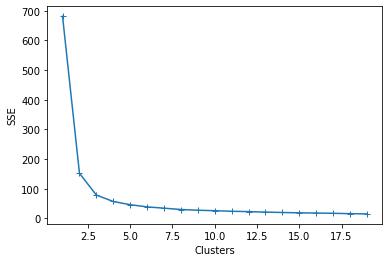

In [8]:
import matplotlib.pyplot as plt

plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.plot(num_clusters, sse, marker='+');

In [9]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [10]:
df['Cluster'] = y_predicted
df['Target'] = iris.target
df.sample(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster,Target
119,6.0,2.2,5.0,1.5,2,2
42,4.4,3.2,1.3,0.2,1,0
129,7.2,3.0,5.8,1.6,0,2
28,5.2,3.4,1.4,0.2,1,0
31,5.4,3.4,1.5,0.4,1,0
125,7.2,3.2,6.0,1.8,0,2
30,4.8,3.1,1.6,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
51,6.4,3.2,4.5,1.5,2,1
101,5.8,2.7,5.1,1.9,2,2
